In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [16]:
#Read in the dataset and take a look at the top few rows here
df = pd.read_csv('python/ab_test/ab_data.csv')
df.head(10)


,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [17]:
#. Use the cell below to find the number of rows in the dataset.
df.shape[0]

294478

In [20]:
#The number of unique users in the dataset
unique_users = df.groupby('user_id')['group'].nunique().count()
unique_users

290584

In [11]:
#The proportion of users converted.

#number of users who are converted 
total_converted = df[df['converted'] == 1].shape[0]

#proportion of users converted
proportion_of_converted_users = total_converted / unique_users

proportion_of_converted_users 

0.12126269856564711

In [22]:
#The number of times the new_page and treatment don't match.
new_page_not_match = df.query('landing_page == "new_page" and group == "control"').shape[0]
new_page_not_match

1928

In [23]:
#The number of times the old_page and control don't match.
old_page_not_match = df.query('landing_page == "old_page" and group == "treatment"').shape[0]
old_page_not_match

1965

In [24]:
#Do any of the rows have missing values?#
null_value = df[df['user_id'].isnull()].count()
null_value

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [25]:
#Do any of the rows have missing values?# 

#This is another way 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


2. For the rows where treatment does not match with new_page or control does not match with old_page,
we cannot be sure if this row truly received the new or old page. Use Quiz 2 in the classroom to figure out how we should handle these rows.

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz. 
Store your new dataframe in df2.

In [28]:
#In order to solve the problem, I will select only conforming columns 


In [29]:
#select dataframe where new_page and treatment do match.
df_t = df.query('landing_page == "new_page" and group == "treatment"')
df_t.shape

(145311, 5)

In [30]:
#select dataframe where old_page and control do match.
df_c = df.query('landing_page == "old_page" and group == "control"')
df_c.shape

(145274, 5)

In [31]:
#Merge the two dataframes together to create a new data frame named df2
df2 = pd.merge(df_t, df_c, how = 'outer')
df2.shape

(290585, 5)

In [44]:
df2.head()


,user_id,timestamp,group,landing_page,converted
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [42]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [32]:
#How many unique user_ids are in df2?
unique_users = df2.groupby('user_id')['user_id'].nunique().count()
unique_users

290584

In [33]:
#There is one user_id repeated in df2. What is it?
repeated_id = df2[df2['user_id'].duplicated()]
repeated_id['user_id'].tolist()

[773192]

In [75]:
#What is the row information for the repeat user_id?
repeated_id

,user_id,timestamp,group,landing_page,converted
1404,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [34]:
#Remove one of the rows with a duplicate user_id, but keep your dataframe as df2.
df2.drop_duplicates(inplace= True) 

Use df2 in the cells below to answer the quiz questions related to Quiz 4 in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [35]:
total_converted = df2[df2['converted'] == 1].shape[0]

#probability of all users that converted
probability_of_conversion = total_converted / unique_users

probability_of_conversion

0.11959708724499628

In [37]:
#Given that an individual was in the control group, what is the probability they converted?
ctr_df2 = df2.query('group == "control" and converted == "1"')
ctr_grp_converted = ctr_df2.shape[0]

#Total number of people in the control group 
ctr_grp_total = df2.query('group == "control"')
ctr_grp_total = ctr_grp_total.shape[0]

#probability of individual in control group converting 
ctr_prob = ctr_grp_converted / ctr_grp_total 
ctr_prob


0.1203863045004612

In [38]:
 #Given that an individual was in the treatment group, what is the probability they converted?
exp_df2 = df2.query('group == "treatment" and converted == "1"')
exp_grp_converted = exp_df2.shape[0]

#Total number of people in the control group 
exp_grp_total = df2.query('group == "control"')
exp_grp_total = exp_grp_total.shape[0]

#probability of individual in control group converting 
exp_prob = exp_grp_converted / exp_grp_total 
exp_prob

0.1188375070556328

In [39]:
#What is the probability that an individual received the new page?
landpage_df = df2.query('landing_page  == "new_page"')
landpage_df = landpage_df.shape[0]

landing_total = df2.shape[0]

#probability individual received the landing page 
newpage_prob = landpage_df / landing_total
newpage_prob

0.5000636646764286

Consider your results from parts (a) through (d) above, and 
explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.


from the above analysis, individuals from the treatement group had a conversion rate of 11.88% while the control group 
individuals had a slightly higher conversion rate at 12.04%. 
From the above, it appears that the treatment group does not lead to more conversions than the control group.



Part II - A/B Test

 For now, consider you need to make the decision just based on all the data provided. If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be? You can state your hypothesis in terms of words or in terms of  𝑝𝑜𝑙𝑑  and  𝑝𝑛𝑒𝑤 , which are the converted rates for the old and new pages.

Null Hypotheses: P𝑜𝑙𝑑 is equal greater than or equal to   𝑝𝑛𝑒𝑤 

Alternative Hypothesis:  𝑝𝑛𝑒𝑤 is greater than 𝑝𝑜𝑙𝑑


Assume under the null hypothesis,  𝑝𝑛𝑒𝑤  and  𝑝𝑜𝑙𝑑  both have "true" success rates equal to the converted success rate regardless of page - that is  𝑝𝑛𝑒𝑤  and  𝑝𝑜𝑙𝑑  are equal. Furthermore, assume they are equal to the converted rate in ab_data.csv regardless of the page.


Use a sample size for each page equal to the ones in ab_data.csv.


Perform the sampling distribution for the difference in converted between the two pages over 10,000 iterations of calculating an estimate from the null.


Use the cells below to provide the necessary parts of this simulation. If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem. You can use Quiz 5 in the classroom to make sure you are on the right track.


a. What is the conversion rate for 𝑝𝑛𝑒𝑤 under the null?

In [54]:
p_new = df2.converted.mean()
p_new

0.11959667567149027

What is the conversion rate for  𝑝𝑜𝑙𝑑  under the null?

In [56]:
p_old = df2.converted.mean()
p_old

0.11959667567149027

What is  𝑛𝑛𝑒𝑤 , the number of individuals in the treatment group?

In [63]:
df2_treatment = df2[df2['group'] == 'treatment'].shape[0]
df2_treatment

145311

What is  𝑛𝑜𝑙𝑑 , the number of individuals in the control group?

In [64]:
df2_control = df2[df2['group'] == 'control'].shape[0]
df2_control

145274

Simulate  𝑛𝑛𝑒𝑤  transactions with a conversion rate of  𝑝𝑛𝑒𝑤  under the null. Store these  𝑛𝑛𝑒𝑤  1's and 0's in new_page_converted.

In [104]:
new_page_converted = np.random.choice([1, 0], size=df2_treatment, p=[df2.converted.mean(), (1-(df2.converted.mean()))])


array([0, 1, 0, ..., 0, 0, 0])

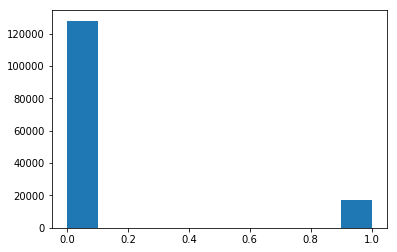

In [69]:
plt.hist(new_page_converted);

Simulate  𝑛𝑜𝑙𝑑  transactions with a conversion rate of  𝑝𝑜𝑙𝑑  under the null. Store these  𝑛𝑜𝑙𝑑  1's and 0's in old_page_converted.

In [70]:
# simulate under null for n_new
old_page_converted = np.random.choice([1, 0], size=df2_control, p=[df2.converted.mean(), (1-(df2.converted.mean()))])

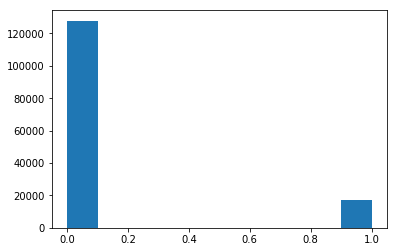

In [72]:
plt.hist(old_page_converted);

Find  𝑝𝑛𝑒𝑤  -  𝑝𝑜𝑙𝑑  for your simulated values from part (e) and (f) above

In [75]:
new_page_converted.mean() - old_page_converted.mean()

-0.00036780345919475155

Create 10,000  𝑝𝑛𝑒𝑤  -  𝑝𝑜𝑙𝑑  values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called p_diffs.

In [129]:
#Create a sampling distribution of the difference in proportions
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.choice([1, 0], size=df2_treatment, p=[df2.converted.mean(), (1-(df2.converted.mean()))])
    old_page_converted = np.random.choice([1, 0], size=df2_control, p=[df2.converted.mean(), (1-(df2.converted.mean()))])
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

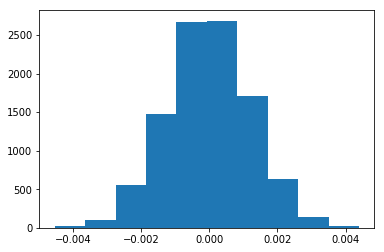

In [130]:
plt.hist(p_diffs);

What proportion of the p_diffs are greater than the actual difference observed in ab_data.csv?

(array([  18.,  122.,  615., 1572., 2616., 2654., 1634.,  633.,  114.,
          22.]),
 array([-4.41338020e-03, -3.52983860e-03, -2.64629701e-03, -1.76275542e-03,
        -8.79213823e-04,  4.32776996e-06,  8.87869363e-04,  1.77141096e-03,
         2.65495255e-03,  3.53849414e-03,  4.42203574e-03]),
 <a list of 10 Patch objects>)

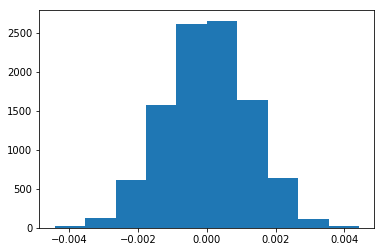

In [134]:
diff = np.array(p_diffs)

null_val = np.random.normal(0, diff.std(), 10000)
plt.hist(null_val);
##calculate mean of p_diffs
#p_diffs = np.array(p_diffs).mean()
#p_diffs

In [135]:
ab_data_diff = exp_prob - ctr_prob
ab_data_diff

-0.0015487974448284009

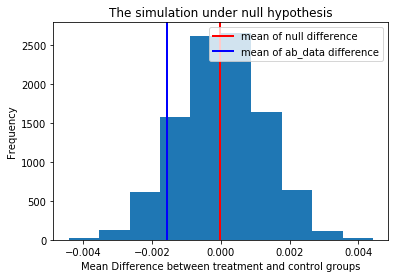

In [145]:
# The parameter is less than some value in the alternative hypothesis

# low is the difference between treatment and control groups in ab_data
low = ab_data_diff

# low is the difference between treatment and control groups in null hypothesis
high = (np.array(p_diffs).mean())

plt.hist(null_val);

plt.title('The simulation under null hypothesis')
plt.xlabel('Mean Difference between treatment and control groups')
plt.ylabel('Frequency')
plt.axvline(x=high, color='r', linewidth=2, label='mean of null difference')
plt.axvline(x=low, color='b', linewidth=2, label='mean of ab_data difference')
plt.legend()


What proportion of the p_diffs are greater than the actual difference observed in ab_data.csv?

In [152]:
# compute p value
(null_val > ab_data_diff).mean()

0.8983

Please explain using the vocabulary you've learned in this course what you just computed in part j. What is this value called in scientific studies? What does this value mean in terms of whether or not there is a difference between the new and old pages?

Answer 

The proportion of the p_diffs (null_val) that are greater than the actual difference observed in ab_data.csv is called the p-value

The p-value is the probability of observing your statistic given that the null hypothesis is true.

The null hypothesis is the probability that the difference in means between the old page and the new page being equal or less than 0. The alternative hypothesis is the probability that the difference in mean would be greater than 0. However, the difference is less than zero, and the p-value is very large. We do not have evidence to rejust the null.

Question L

We could also use a built-in to achieve similar results. Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let n_old and n_new refer the the number of rows associated with the old page and new pages, respectively.

In [147]:
import statsmodels.api as sm

convert_old = ctr_grp_converted
convert_new = exp_grp_converted
n_old = df2_control
n_new = df2_treatment

Question M

Now use stats.proportions_ztest to compute your test statistic and p-value.

In [156]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
z_score, p_value

(1.3116075339133115, 0.905173705140591)

What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages? Do they agree with the findings in parts j. and k.?

Answer

A z-score describes the position of a raw score in terms of its distance from the mean when measured in standard deviation units. The z-score is positive if the value lies above the mean, and negative if it lies below the mean. (https://www.simplypsychology.org/z-score.html)

Before this test began, we would have picked a significance level. In my case I want to consider 95%. Since this is a test for the difference, it's a two-tail test so a z-score past -1.96 or 1.96 will be significant. (knowledgetack)

The conversion rate of the new landing page is only 1.311607 standard deviations from the conversion rate of the old landing page. This is less than the critical value of 1.96. We cannot reject the hull hypothesis that the difference between the two conversion rates is no different from zero. 

Also, the p-value is 0.90517. The p-value was calculated with the null hypothesis being that the old page would convert more or equal to the new page and the alternative was the new page would convert more than the old page. 

Part III - A regression approach
1. In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

I would say linear regression. Why? Because it is a linear approach for modelling the relationship between a scalar dependent variable y and one or more explanatory/independent variables (in the cases of multilinear regression) denoted X .(wikipedia)

NOTE: There is only one explanatory variable in this case.

b. The goal is to use statsmodels to fit the regression model you specified in part a. to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received. Add an intercept column, as well as an ab_page column, which is 1 when an individual receives the treatment and 0 if control.

In [159]:
df2['intercept']=1

In [160]:
df2['ab_page']=0

In [161]:
ab_page_index = df2[df2['group']=='treatment'].index

In [162]:
df2.loc[ab_page_index, "ab_page"] = 1

In [163]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1


C. Use statsmodels to import your regression model. Instantiate the model, and fit the model using the two columns you created in part b. to predict whether or not an individual converts.

In [164]:
lm = sm.OLS(df2['converted'], df2[['intercept', 'ab_page']])
results=lm.fit()

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [166]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.720
Date:                Fri, 25 Oct 2019   Prob (F-statistic):              0.190
Time:                        22:20:42   Log-Likelihood:                -85267.
No. Observations:              290585   AIC:                         1.705e+05
Df Residuals:                  290583   BIC:                         1.706e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1204      0.001    141.407      0.000       0.119       0.122
ab_page       -0.0016      0.001     -1.312      0.190      -0.004       0.001
==============================================================================
Omnibus:                   125554.337   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414318.532
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         2.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

e. What is the p-value associated with ab_page? Why does it differ from the value you found in the Part II?

Answer 

The p-value associated with ab_page is 0.190

In Part II, the p-value was calculated where the null hypothesis was that the new page would convert more than the old page, and the alternative was the old page converted more than or equal to the new page. My p-value in part II was 0.8983

f. Now, you are considering other things that might influence whether or not an individual converts. Discuss why it is a good idea to consider other factors to add into your regression model. Are there any disadvantages to adding additional terms into your regression model?

Answer 

In  my opinion, it would be a good idea to consider other factors to add into the regression model. Time is very important i.e. the time from the start of the experiment to the end of the experiment.  

The huge disadvantage of this is the difficulty in performing a time series analysis which comes with the complexity of a time series anomaly detection.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the countries.csv dataset and merge together your datasets on the approporiate rows. Here are the docs for joining tables.

In [169]:
df_countries = pd.read_csv('python/ab_test/countries.csv')
df_countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [177]:
country_dummies = pd.get_dummies(df_countries['country'], drop_first = True)
df_new = df_countries.join(country_dummies)

In [178]:
df_new.head()

,user_id,country,UK,US
0,834778,UK,1,0
1,928468,US,0,1
2,822059,UK,1,0
3,711597,UK,1,0
4,710616,UK,1,0


In [179]:
df3 = df2.set_index('user_id').join(df_new.set_index('user_id'))

In [180]:
lm = sm.OLS(df3['converted'], df3[['intercept', 'UK', 'US']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.605
Date:                Fri, 25 Oct 2019   Prob (F-statistic):              0.201
Time:                        22:35:23   Log-Likelihood:                -85266.
No. Observations:              290585   AIC:                         1.705e+05
Df Residuals:                  290582   BIC:                         1.706e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1153      0.003     42.792      0.000       0.110       0.121
UK             0.0053      0.003      1.787      0.074      -0.001       0.011
US             0.0042      0.003      1.516      0.130      -0.001       0.010
==============================================================================
Omnibus:                   125553.266   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414311.221
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         9.94
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the above, Canada is the baseline. Given the small correlation coefficient of 0.0053 and 0.0042 for UK and US respectively. This means the relationship between country and conversion is weak.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion. Create the necessary additional columns, and fit the new model.

Provide the summary results, and your conclusions based on the results.

In [181]:
lm = sm.OLS(df3['converted'], df3[['intercept', 'ab_page', 'UK', 'US']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.640
Date:                Fri, 25 Oct 2019   Prob (F-statistic):              0.178
Time:                        22:44:33   Log-Likelihood:                -85266.
No. Observations:              290585   AIC:                         1.705e+05
Df Residuals:                  290581   BIC:                         1.706e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1161      0.003     42.036      0.000       0.111       0.122
ab_page       -0.0016      0.001     -1.308      0.191      -0.004       0.001
UK             0.0053      0.003      1.784      0.074      -0.001       0.011
US             0.0042      0.003      1.514      0.130      -0.001       0.010
==============================================================================
Omnibus:                   125552.050   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414302.956
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         10.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The p-value for ab_page is 0.191 using the 0.05 cutoff point.
 
From the above regression, The p-value is still relatively large and thus We fail to reject the null hypothesis.

RESOURCES

https://www.simplypsychology.org/z-score.html
https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html
https://en.wikipedia.org/wiki/Linear_regression